In [11]:
# Natural Language Tool Kit (NLTK)
import nltk
import os

# Regular Expression for text preprocessing
import re

# Heap (priority) queue algorithm to get the top sentences
import heapq

# NumPy for numerical computing
import numpy as np

# pandas for creating DataFrames
import pandas as pd
from tqdm import tqdm
# matplotlib for plot
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
import nltk
from nltk import download

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Apple_Acquires_AI_Startup.txt to Apple_Acquires_AI_Startup.txt


In [12]:
def read_text_file(text_file_path):
    print('Reading file in ', text_file_path)
    with open(text_file_path, 'r') as f:
        text_data = f.read()
    return text_data

In [14]:
# load text file
with open('0a000f521734500aa360bf6bb2bb31446e4d66cd.story', encoding="utf8", errors='ignore') as f:
    file_data = f.read()

In [15]:
# view text data
print(file_data)

Rory McIlroy is off to a good start at the Scottish Open. He's hoping for a good finish, too, after missing the cut at the Irish Open.

McIlroy shot a course record 7-under-par 64 at Royal Aberdeen on Thursday, and he was actually the second player to better the old mark -- Sweden's Kristoffer Broberg had earlier fired a 65.

McIlroy carded eight birdies and one bogey in windy, chilly conditions.

"Going out this morning in these conditions I thought anything in the 60s would be a good score, so to shoot something better than that is pleasing," McIlroy was quoted as saying by the European Tour's website.

A win Sunday would be the perfect way for former No. 1 McIlroy to prepare for the British Open, which starts next week at Royal Liverpool. He won the last of his two majors in 2012.

"Everything was pretty much on," McIlroy said. "I controlled my ball flight really well, which is the key to me playing well in these conditions and on these courses.

"I've been working the last 10 days 

In [16]:
text = file_data
text = re.sub(r'\[[0-9]*\]',' ',text) # replace reference number i.e. [1], [10], [20] with empty space, if any..
text = re.sub(r'\s+',' ',text) # replace one or more spaces with single space
print(text)

Rory McIlroy is off to a good start at the Scottish Open. He's hoping for a good finish, too, after missing the cut at the Irish Open. McIlroy shot a course record 7-under-par 64 at Royal Aberdeen on Thursday, and he was actually the second player to better the old mark -- Sweden's Kristoffer Broberg had earlier fired a 65. McIlroy carded eight birdies and one bogey in windy, chilly conditions. "Going out this morning in these conditions I thought anything in the 60s would be a good score, so to shoot something better than that is pleasing," McIlroy was quoted as saying by the European Tour's website. A win Sunday would be the perfect way for former No. 1 McIlroy to prepare for the British Open, which starts next week at Royal Liverpool. He won the last of his two majors in 2012. "Everything was pretty much on," McIlroy said. "I controlled my ball flight really well, which is the key to me playing well in these conditions and on these courses. "I've been working the last 10 days on kee

In [17]:
# generate clean text
clean_text = text.lower() # convert all uppercase characters into lowercase characters

# replace characters other than [a-zA-Z0-9], digits & one or more spaces with single space
regex_patterns = [r'\W',r'\d',r'\s+']
for regex in regex_patterns:
    clean_text = re.sub(regex,' ',clean_text)

print(clean_text)

rory mcilroy is off to a good start at the scottish open he s hoping for a good finish too after missing the cut at the irish open mcilroy shot a course record under par at royal aberdeen on thursday and he was actually the second player to better the old mark sweden s kristoffer broberg had earlier fired a mcilroy carded eight birdies and one bogey in windy chilly conditions going out this morning in these conditions i thought anything in the s would be a good score so to shoot something better than that is pleasing mcilroy was quoted as saying by the european tour s website a win sunday would be the perfect way for former no mcilroy to prepare for the british open which starts next week at royal liverpool he won the last of his two majors in everything was pretty much on mcilroy said i controlled my ball flight really well which is the key to me playing well in these conditions and on these courses i ve been working the last days on keeping the ball down hitting easy shots and taking

In [18]:
# split (tokenize) the sentences
sentences = nltk.sent_tokenize(text)
print(sentences)

['Rory McIlroy is off to a good start at the Scottish Open.', "He's hoping for a good finish, too, after missing the cut at the Irish Open.", "McIlroy shot a course record 7-under-par 64 at Royal Aberdeen on Thursday, and he was actually the second player to better the old mark -- Sweden's Kristoffer Broberg had earlier fired a 65.", 'McIlroy carded eight birdies and one bogey in windy, chilly conditions.', '"Going out this morning in these conditions I thought anything in the 60s would be a good score, so to shoot something better than that is pleasing," McIlroy was quoted as saying by the European Tour\'s website.', 'A win Sunday would be the perfect way for former No.', '1 McIlroy to prepare for the British Open, which starts next week at Royal Liverpool.', 'He won the last of his two majors in 2012.', '"Everything was pretty much on," McIlroy said.', '"I controlled my ball flight really well, which is the key to me playing well in these conditions and on these courses.', '"I\'ve be

In [19]:
# get stop words list
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
# create an empty dictionary to house the word count
word_count = {}

# loop through tokenized words, remove stop words and save word count to dictionary
for word in nltk.word_tokenize(clean_text):
    # remove stop words
    if word not in stop_words:
        # save word count to dictionary
        if word not in word_count.keys():
            word_count[word] = 1
        else:
            word_count[word] += 1

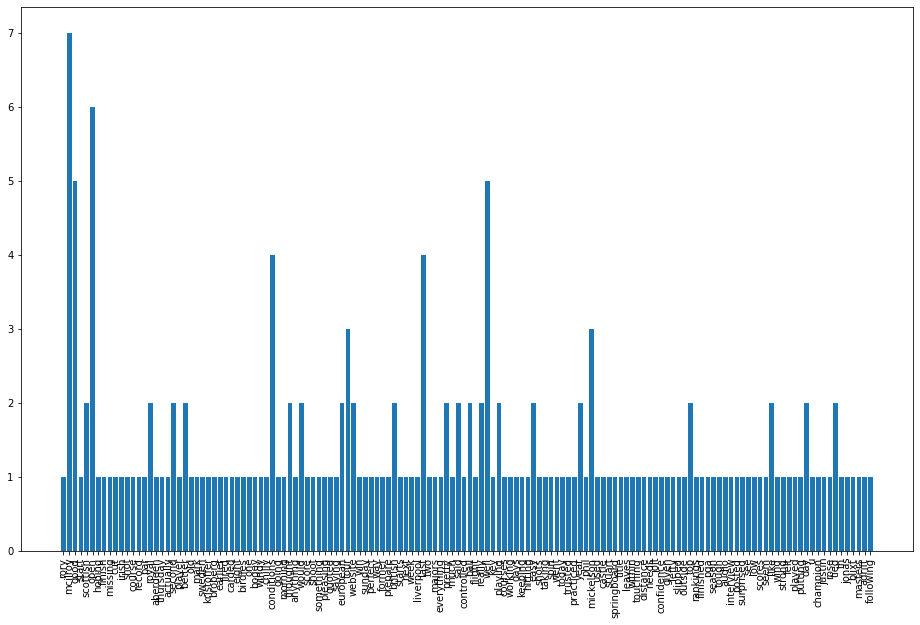

In [21]:
plt.figure(figsize=(16,10))
plt.xticks(rotation = 90)
plt.bar(word_count.keys(), word_count.values())
plt.show()

In [22]:
# helper function for plotting the top words.
def plot_top_words(word_count_dict, show_top_n=20):
    """
    Plot top words
    
    INPUT:
    word_count_dict - dict. word count housed in a dictionary
    show_top_n - int. top n words to display (default 20)
    
    OUTPUT:
    Plot with top n words
    
    """
    word_count_table = pd.DataFrame.from_dict(word_count_dict, orient = 'index').rename(columns={0: 'score'})
    word_count_table.sort_values(by='score').tail(show_top_n).plot(kind='barh', figsize=(10,10))
    plt.show()

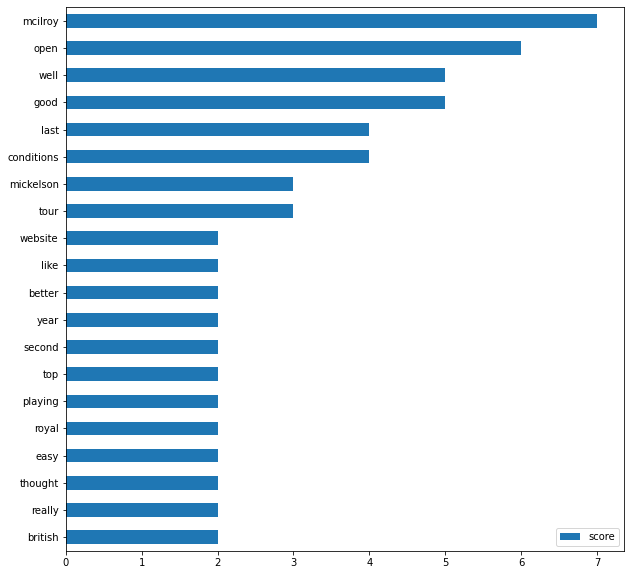

In [23]:
plot_top_words(word_count, 20)

In [24]:
# create empty dictionary to house sentence score    
sentence_score = {}

# loop through tokenized sentence, only take sentences that have less than 30 words, then add word score to form sentence score
for sentence in sentences:
    # check if word in sentence is in word_count dictionary
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word_count.keys():
            # only take sentence that has less than 30 words
            if len(sentence.split(' ')) < 30:
                # add word score to sentence score
                if sentence not in sentence_score.keys():
                    sentence_score[sentence] = word_count[word]
                else:
                    sentence_score[sentence] += word_count[word]

In [25]:
df_sentence_score = pd.DataFrame.from_dict(sentence_score, orient = 'index').rename(columns={0: 'score'})
df_sentence_score.sort_values(by='score', ascending = False)

,score
"""I controlled my ball flight really well, which is the key to me playing well in these conditions and on these courses.",24
Rory McIlroy is off to a good start at the Scottish Open.,22
"1 McIlroy to prepare for the British Open, which starts next week at Royal Liverpool.",22
"""I thought it was tough conditions,"" Mickelson said in an audio interview posted on the European Tour's website.",22
"McIlroy carded eight birdies and one bogey in windy, chilly conditions.",18
"""I felt like I played well and had a good putting day.",17
"He's hoping for a good finish, too, after missing the cut at the Irish Open.",16
"""I was surprised to see some low scores out there because it didn't seem like it was playing easy, and the wind was pretty strong.",15
"""Everything was pretty much on,"" McIlroy said.",13
A win Sunday would be the perfect way for former No.,7


In [26]:
# get the best 3 sentences for summary             
best_sentences = heapq.nlargest(3, sentence_score, key=sentence_score.get)

In [27]:
print('SUMMARY')
print('------------------------')

# display top sentences based on their sentence sequence in the original text
for sentence in sentences:
    if sentence in best_sentences:
        print (sentence)

SUMMARY
------------------------
Rory McIlroy is off to a good start at the Scottish Open.
1 McIlroy to prepare for the British Open, which starts next week at Royal Liverpool.
"I controlled my ball flight really well, which is the key to me playing well in these conditions and on these courses.
